## Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

The **goal** is to plan a campaign for 2017 using data from 2016.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('MAX_ROWS', None)

In [2]:
# read the data
dataset = r'/datasets/games.csv'
games = pd.read_csv(dataset)

In [3]:
# num of records and attributes
games.shape

(16715, 11)

In [4]:
# datatypes
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [5]:
# proportion of missing data
games.isnull().sum()/games.shape[0]

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [104]:
games.isna().mean().reset_index()

,index,0
0,name,0.000120
1,platform,0.000000
2,year_of_release,0.016093
3,genre,0.000120
4,na_sales,0.000000
5,eu_sales,0.000000
6,jp_sales,0.000000
7,other_sales,0.000000
8,critic_score,0.513192
9,user_score,0.545917


In [6]:
# duplicate check
games.duplicated().sum()

0

In [7]:
# describe numeric values
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
# first 5 records
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Conclusion**

1) There are 16715 games and 11 attributes describing each game.

2) `critic_score`, `user_score` and `rating` each have missing values ranging from 40% - 51% of their values missing; this will need to be investigated further.

3) A few games with these attributes - `genre`, `name` and `year_of_release`, are missing; it is less than 2%.

4) There are no duplicates.

5) `user_score` is stored as an object, which could be changed to float. Similarly because of missing values `critic_score` is stored as a floating point number, which can be changed to unsigned int. `year` can also be saved as an integer.

6) From the numerical summary, the sales across regions vary wildly from few hundred thousands to tens of million dollars (USD).

7) The earliest recorded game in this dataset was released in 1980.

Further investigation will be carried out in the cells below

## Data preparation

### Change the case of the columns

In [9]:
# loop through the columns and convert to lowercase
# then assign the new columns to replace the original
# names
cols = [game.lower() for game in games.columns]
games.columns = cols

In [10]:
# check if renaming happened
games.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Change the datatype for the following

#### year_of_release, critic_score

In [11]:
def dtype_conversion(series, dtype='Int16'):
    """
    Convert the current dtype of the series
    to its new dtype
    """
    return series.astype(dtype)

In [12]:
games['year_of_release'] = dtype_conversion(games['year_of_release'])

In [13]:
games['critic_score'] = dtype_conversion(games['critic_score'])

In [14]:
# user_score has a value called tdb. replace this with nan
games[games['user_score'] == 'tbd'].shape

(2424, 11)

In [15]:
# replace tbd with nan
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [106]:
games['user_score'].replace('tbd', np.nan).astype(float)

0        8.000000
1             NaN
2        8.296875
3        8.000000
4             NaN
5             NaN
6        8.500000
7        6.601562
8        8.398438
9             NaN
10            NaN
11       8.601562
12            NaN
13       7.699219
14       6.300781
15       7.398438
16       8.203125
17       9.000000
18            NaN
19       7.898438
20            NaN
21            NaN
22            NaN
23       8.101562
24       8.703125
25            NaN
26       7.101562
27            NaN
28       8.398438
29       3.400391
30            NaN
31            NaN
32       6.300781
33            NaN
34       5.300781
35       4.800781
36       6.300781
37       3.199219
38       8.500000
39       8.898438
40       8.203125
41       6.398438
42       8.296875
43       8.703125
44       7.800781
45            NaN
46            NaN
47            NaN
48       8.500000
49       8.898438
50            NaN
51       7.898438
52       8.703125
53       8.398438
54       7.500000
55       6

In [16]:
# check
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [17]:
games['user_score'] = dtype_conversion(games['user_score'], 'float16')

#### change rating to number

According to the esrb website, the following definitions have changed:
[ESRB ratings classification](https://www.esrb.org/blog/awareness-use-and-trust-of-esrb-video-game-ratings-reach-historical-high-point-among-parents/#:~:text=The%20ESRB%20rating%20system%20includes,adults%20age%2018%20and%20older.)

K-A - Kids to Adults 10+ years

**Definition of ratings**<br/>
EC - Early childhood, 3+ years<br/>
E - Everyone, 6+ years<br/>
E10+ - Every 10+ years<br/>
T - Teens, 13+ years<br/>
M - Mature teens, 17+ years<br/>
AO - Adults only 18+ years<br/>
RP - Rating pending<br/>

In [18]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
# replace K-A with E10+
games[games['rating'] == 'K-A'].shape

(3, 11)

In [20]:
games['rating'] = games['rating'].str.replace('K-A', 'E10+')

In [21]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
# arrange ratings by age appropriateness
games['rating'] = pd.Categorical(games['rating'], 
               categories=['RP', 'EC', 'E', 'E10+', 'T', 'M', 'AO'], 
              ordered=True)

#### Does name require and cleaning?

In [23]:
# number of unique games
games['name'].nunique()

11559

In [24]:
# frequency distribution of all games
games['name'].value_counts()

Need for Speed: Most Wanted                                                                                                             12
LEGO Marvel Super Heroes                                                                                                                 9
Madden NFL 07                                                                                                                            9
FIFA 14                                                                                                                                  9
Ratatouille                                                                                                                              9
Angry Birds Star Wars                                                                                                                    8
LEGO The Hobbit                                                                                                                          8
FIFA Soccer 13             

#### Create a new field - Manufacturer; the source will be platform

In [25]:
# unique platforms
games['platform'].nunique()

31

In [26]:
# unique platforms
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [27]:
# most of these platforms are offered by major
# companies. We could replace them by the manufacturer
# wherever applicable for simplicity
games['platform'].value_counts().head()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: platform, dtype: int64

In [28]:
# https://en.wikipedia.org/wiki/Final_Fantasy
# https://en.wikipedia.org/wiki/List_of_god_video_games
manufacturers = {
    'Wii' : 'Nintendo', 
    'NES' : 'Nintendo',
    'GB'  : 'Nintendo', 
    'DS'  : 'Nintendo',
    'SNES': 'Nintendo',
    'GBA' : 'Nintendo',
    '3DS' : 'Nintendo',
    'WiiU': 'Nintendo',
    'GC'  : 'Nintendo',
    'N64' : 'Nintendo',
    'GEN' : 'Sega',
    'DC'  : 'Sega',
    'SAT' : 'Sega',
    'GG'  : 'Sega',
    'SCD' : 'Sega',
    'PS'  : 'Sony',
    'PSP' : 'Sony',
    'PS3' : 'Sony',
    'PS4' : 'Sony',
    'PS2' : 'Sony',
    'PSV' : 'Sony',
    'XOne': 'Microsoft',
    'X360': 'Microsoft',
    'XB'  : 'Microsoft',
    '2600': 'Atari',
    'PCFX': 'NEC',
    'TG16': 'NEC',
    '3DO' : 'Panasonic',
}
def map_platforms(platform):
    """
    Map platforms to their manufacturers
    """
    return manufacturers.get(platform, platform)

In [29]:
games['manufacturer'] = games['platform'].apply(map_platforms)

In [30]:
games['manufacturer'].value_counts().head()

Sony         6720
Nintendo     6270
Microsoft    2333
PC            974
Sega          261
Name: manufacturer, dtype: int64

#### Does genre require cleaning?

In [31]:
# unique genres
games['genre'].nunique()

12

In [32]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [33]:
# proportion of manufacturers
games['manufacturer'].value_counts(normalize=True, dropna=False)

Sony         0.402034
Nintendo     0.375112
Microsoft    0.139575
PC           0.058271
Sega         0.015615
Atari        0.007957
NG           0.000718
WS           0.000359
Panasonic    0.000179
NEC          0.000179
Name: manufacturer, dtype: float64

#### Analyze the missing values

In [34]:
# distribution of top 10 critic_score
games['critic_score'].value_counts(normalize=True).head(10)

70    0.031461
71    0.031215
75    0.030109
78    0.029495
73    0.029249
80    0.029126
76    0.028880
72    0.027774
74    0.027774
77    0.027651
Name: critic_score, dtype: float64

In [35]:
# distribution of rating for missing critic_score
games[games['critic_score'].notnull()]['rating'].value_counts(normalize=True)

E       0.348647
T       0.327787
M       0.184132
E10+    0.138937
RP      0.000372
AO      0.000124
EC      0.000000
Name: rating, dtype: float64

In [36]:
# distribution of manufacturer for missing critic_score
games[games['critic_score'].isnull()]['manufacturer'].value_counts(normalize=True)

Nintendo     0.445792
Sony         0.415948
Microsoft    0.060970
PC           0.030194
Sega         0.028795
Atari        0.015505
NG           0.001399
WS           0.000699
NEC          0.000350
Panasonic    0.000350
Name: manufacturer, dtype: float64

In [37]:
# distribution of rating for missing critic_score
games[games['critic_score'].isnull()]['rating'].value_counts(normalize=True)

E       0.623747
T       0.169393
E10+    0.160422
M       0.042216
EC      0.004222
AO      0.000000
RP      0.000000
Name: rating, dtype: float64

In [38]:
# median critic_score
games[games['critic_score'].notnull()]['critic_score'].median()

71.0

In [39]:
def fill_missing_scores(score):
    """
    Fill the missing score using the proportion
    of occurrences of provided scores
    """
    np.random.seed(42)
    a = score.value_counts().index
    p = score.value_counts(normalize=True).values
    size = score[score.isnull()].shape[0]
    return np.random.choice(a, size=size, p=p)

In [40]:
# make a copy of the critic score as we
# are unsure whether filling the missing values
# will change the distribution of the dataset or not
games['cleaned_critic_score'] = games['critic_score']
games.loc[games['cleaned_critic_score'].isnull(), 'cleaned_critic_score'] = (
    fill_missing_scores(games['cleaned_critic_score'])
)

In [41]:
# top 10 cleaned_critic_scores after filling missing values
games['cleaned_critic_score'].value_counts(normalize=True).head(10)

71    0.032306
75    0.032127
70    0.031050
80    0.029674
76    0.029435
78    0.029315
73    0.029016
74    0.028358
77    0.028059
72    0.027042
Name: cleaned_critic_score, dtype: float64

In [42]:
# top 10 user_scores before filling missing values
games['user_score'].value_counts(normalize=True).head(10)

7.800781    0.042688
8.000000    0.038208
8.203125    0.037154
8.296875    0.033465
8.500000    0.033333
7.500000    0.033070
7.898438    0.032806
8.101562    0.032148
7.699219    0.031621
7.300781    0.031094
Name: user_score, dtype: float64

In [43]:
games['cleaned_user_score'] = games['user_score']
games.loc[games['cleaned_user_score'].isnull(), 'cleaned_user_score'] = (
    fill_missing_scores(games['user_score'])
)

In [44]:
# top 10 cleaned_user_scores after filling missing values
games['cleaned_user_score'].value_counts(normalize=True).head(10)

7.800781    0.042716
8.000000    0.040024
8.203125    0.037152
8.296875    0.033922
8.500000    0.033862
7.898438    0.033084
8.101562    0.033084
7.500000    0.033024
7.300781    0.031469
7.699219    0.030571
Name: cleaned_user_score, dtype: float64

In [45]:
# distribution of ratings before filling missing values
games['rating'].value_counts(normalize=True)

E       0.401045
T       0.297618
M       0.157101
E10+    0.143029
EC      0.000804
RP      0.000302
AO      0.000101
Name: rating, dtype: float64

In [46]:
games['cleaned_rating'] = games['rating']
games.loc[games['cleaned_rating'].isnull(), 'cleaned_rating'] = (
    fill_missing_scores(games['rating'])
)

In [47]:
# distribution of ratings after filling missing values
games['cleaned_rating'].value_counts(normalize=True)

E       0.403231
T       0.298115
M       0.155310
E10+    0.142208
EC      0.000838
RP      0.000239
AO      0.000060
Name: cleaned_rating, dtype: float64

In [48]:
#### Create a total_sales column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [49]:
# top 10 year_of_release before filling missing values
games['year_of_release'].value_counts(normalize=True).head(10)

2008    0.086769
2009    0.086708
2010    0.076310
2007    0.072784
2011    0.069075
2006    0.061170
2005    0.057096
2002    0.050407
2003    0.047124
2004    0.046333
Name: year_of_release, dtype: float64

In [50]:
games['cleaned_year_of_release'] = games['year_of_release']
games.loc[games['cleaned_year_of_release'].isnull(), 'cleaned_year_of_release'] = (
    fill_missing_scores(games['year_of_release'])
)

In [51]:
# top 10 year_of_release after filling missing values
games['cleaned_year_of_release'].value_counts(normalize=True).head(10)

2009    0.086868
2008    0.086748
2010    0.076518
2007    0.072929
2011    0.069219
2006    0.060664
2005    0.056775
2002    0.050553
2003    0.046964
2004    0.046605
Name: cleaned_year_of_release, dtype: float64

In [52]:
def decades(year):
    """
    Return a decade depending
    on year of release
    """
    try:
        if 1980 <= year < 1990:
            return '80s'
        if 1990 <= year < 2000:
            return '90s'
        if 2000 <= year < 2010:
            return '00s'
        return '10s'
    except:
        return year

In [53]:
# apply the decades()
games['decade'] = games['year_of_release'].apply(decades)

In [54]:
# proportion of decades
games['decade'].value_counts(normalize=True, dropna=False)

00s    0.549985
10s    0.331798
90s    0.105953
80s    0.012264
Name: decade, dtype: float64

**Conclusion**

1) The dtypes for `year_of_release` and `critic_score` were changes to Int16.

2) About 15% of the `user_score` have an invalid value of tbd, which was replaced with np.nan; the data type was changed to float.

3) `rating` was sorted in ascending order based on age appropriateness; one of the old values K-A was replaced with E10+.

4) Need for Speed: Most Wanted appears to be the most popular game available across various platforms.

5) There are 31 unique platforms. A new field called `manufacturer` was created out of `platform` field.

6) There are 12 unique genres.

7) A new field called `decade` was created out of `year_of_release`. The missing values for `year_of_release` were populated using the probability of occurrence of available years in the dataset.

8) The `critic_score`, `user_score` and `rating` appear to be missing at random.

9) Since the impact of filling missing values for `critic_score`, `user_score` and `rating` is not known yet, we have created 3 new fields each, and the missing value is populated based on the probability of occurence of available values in the dataset.

10) A new field called `total_sales` was created by totalling the sales for NA, EU and JP regions, including other sales.

### Analyze the data

#### Look at how many games were released in different years. Is the data for every period significant?

In [55]:
# distribution of decades
games['decade'].value_counts()

00s    9193
10s    5546
90s    1771
80s     205
Name: decade, dtype: int64

This tells us that we can expect to see that most of the games were released in the 2000s; let us confirm this hypothesis.

In [56]:
def draw_bar_chart(df, field, var, kind='bar', normalize=True, title=None, 
                  figsize=(9, 7), grp=True, sort=False, 
                  agg_func='size'):
    """
    Draw a 1D Bar chart
    """
    #plt.figure(figsize=figsize)
    if not grp:
        # sort based on most frequently occurring observation
        df[field].value_counts(normalize=normalize).plot(kind=kind, title=title, figsize=figsize)
    else:
        if not sort:
            df.groupby(field).agg({var: agg_func}).plot(kind=kind, title=title, 
                                                       figsize=figsize)
        else:
            df.groupby(field).agg({var: agg_func}).sort_values(var, ascending=False).plot(kind=kind, title=title, 
                                                                                        figsize=figsize)
    # plt.show()

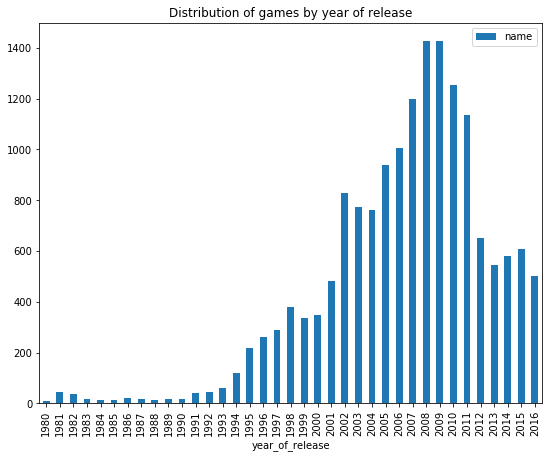

In [57]:
draw_bar_chart(games, 'year_of_release', 'name', title='Distribution of games by year of release')

1) Sales in the early 80s to early 90s was very low; this could probably be attributed to marketing and pricing. It
may have been out of reach for many consumers.

2) Sales subsequently, picked up in the mid 90s, and it reached its peak in the year 2008 and 2009 respectively

3) Sales plummeted from there on touching a low in 2016, which is the last available period in this dataset. A possible reason for the sharp drop after 2008 could be attributed to the financial crisis. In addition, there was a shift towards mobile gaming; it is not clear whether this dataset captures mobile gaming trends.

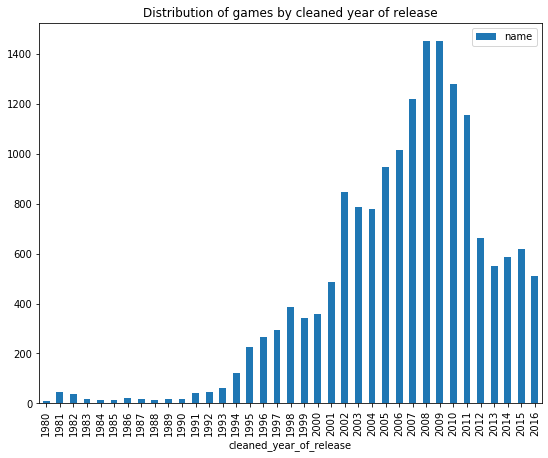

In [58]:
draw_bar_chart(games, 'cleaned_year_of_release', 'name', title='Distribution of games by cleaned year of release')

1) There is no noticeable difference post cleaning the `year_of_release`; the distributions look similar. However, we may see side effects when analyzing individual platforms. So, we will continue to use `year_of_release` unless there is a need to switch to the cleaned version.

#### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

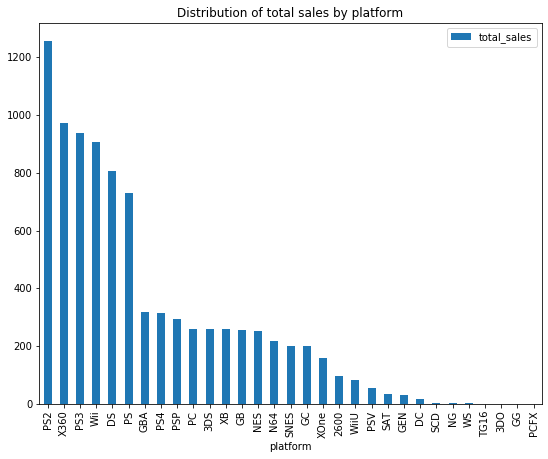

In [59]:
draw_bar_chart(games, 'platform', 'total_sales',
               title='Distribution of total sales by platform',
              sort=True, agg_func='sum')

1) PS2 is the most profitable `platform` closely followed by X360 in last 36 years.

In [60]:
# top 10 platforms by total sales
top10_platforms = games[['platform', 'total_sales']].groupby('platform')['total_sales'].sum().sort_values( 
                                                                                    ascending=False).head(10)

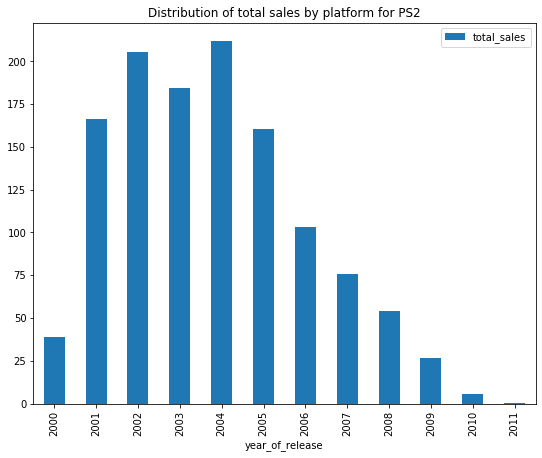

In [61]:
platform = top10_platforms.index[0]
plt = games[games['platform'] == platform].copy()
draw_bar_chart(plt, 'year_of_release', 'total_sales',
               title='Distribution of total sales by platform for {}'.format(platform), 
              agg_func='sum')

1) PS2 `platform` `total_sales` started in year 2000, peaked in 2004, and then dropped from there with 2011 witnessing the lowest sales.

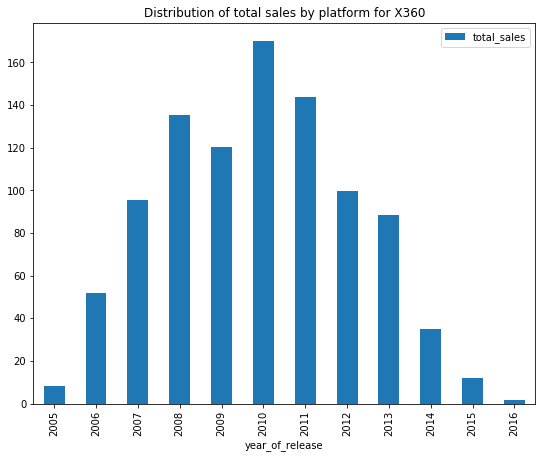

In [62]:
platform = top10_platforms.index[1]
plt = games[games['platform'] == platform].copy()
draw_bar_chart(plt, 'year_of_release', 'total_sales',
               title='Distribution of total sales by platform for {}'.format(platform), 
              agg_func='sum')

1) X360 started selling games in 2005, and it peaked in 2010. From there on, it dropped sharply reaching its nadir in 2016.

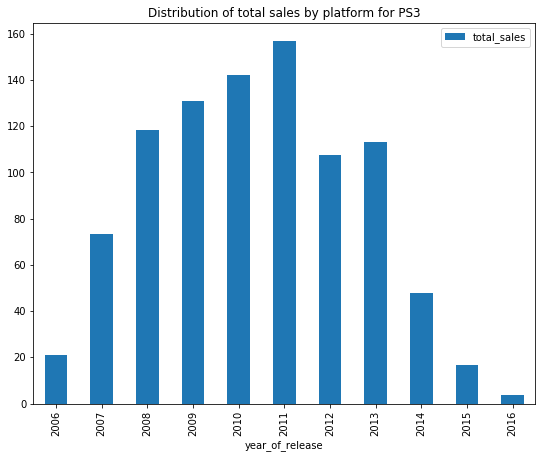

In [63]:
platform = top10_platforms.index[2]
plt = games[games['platform'] == platform].copy()
draw_bar_chart(plt, 'year_of_release', 'total_sales',
               title='Distribution of total sales by platform for {}'.format(platform), 
              agg_func='sum')

1) PS3 debuted in 2006; it peaked in 2011, and like X360, it started to dissipate reaching its bottom in 2016.

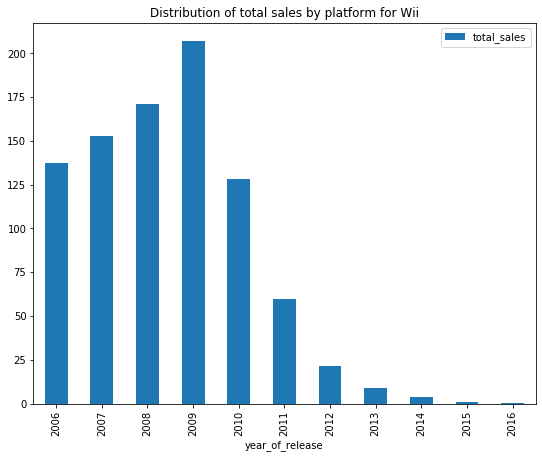

In [64]:
platform = top10_platforms.index[3]
plt = games[games['platform'] == platform].copy()
draw_bar_chart(plt, 'year_of_release', 'total_sales',
               title='Distribution of total sales by platform for {}'.format(platform), 
              agg_func='sum')


1) Wii started with a tremendous sales growth in 2006, and its sales peaked in 2009. However, the sales dropped since then reaching its lowest in 2016.

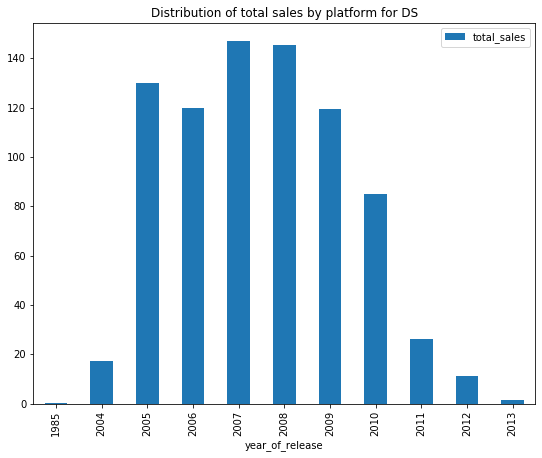

In [65]:
platform = top10_platforms.index[4]
plt = games[games['platform'] == platform].copy()
draw_bar_chart(plt, 'year_of_release', 'total_sales',
               title='Distribution of total sales by platform for {}'.format(platform), 
              agg_func='sum')

1) DS started sales in 2004, it peaked in 2007 and 2008, and then dropped sharply reaching its lowest sales in 2013.

2) There is an outlier in 1985, which can be ignored as DS wasn't available then.

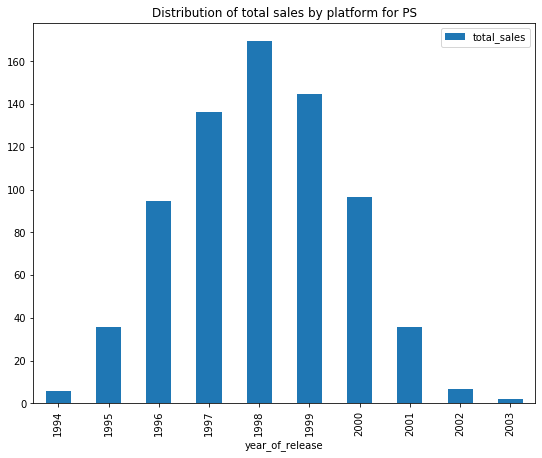

In [66]:
platform = top10_platforms.index[5]
plt = games[games['platform'] == platform].copy()
draw_bar_chart(plt, 'year_of_release', 'total_sales',
               title='Distribution of total sales by platform for {}'.format(platform), 
              agg_func='sum')


1) PS sales started in 1994, and it peaked in 1998, finally dropping to its lowest in 2003.

2) It is also the oldest in the top 5 platforms.

In [67]:
# get the max and min year_of_release for the top 10 platforms
top10_yos = games[games['platform'].isin(top10_platforms.index)][['platform', 
                                    'year_of_release']].groupby('platform')['year_of_release'].agg({min, 
                                                                                  max}).reset_index()
# replace the outlier in DS platform
top10_yos.loc[top10_yos['platform'] == 'DS', 'min'] = 2004
top10_yos['duration'] = top10_yos['max'] - top10_yos['min']

In [68]:
top10_yos.sort_values('duration')

,platform,max,min,duration
6,PS4,2016,2013,3
1,GBA,2007,2000,7
0,DS,2013,2004,9
3,PS,2003,1994,9
5,PS3,2016,2006,10
8,Wii,2016,2006,10
4,PS2,2011,2000,11
7,PSP,2015,2004,11
9,X360,2016,2005,11
2,PC,2016,1985,31


In [69]:
# median duration for a platform in the top 10 based on sales
# is 9.5 years
top10_yos['duration'].median()

10.0

1) The lifespan for a top 10 video game platform is quite varied; the shortest duration is held by PS4, which is
3 years. And the longest durations are held by PS2, PSP, and X360.

2) The median lifespan is 10 years.

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

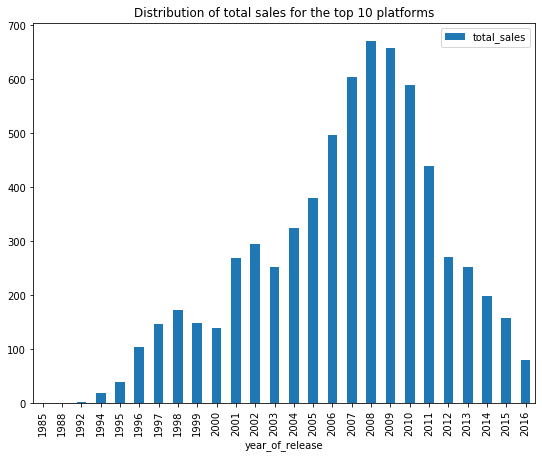

In [70]:
plt = games[games['platform'].isin(top10_platforms.index)]
draw_bar_chart(plt, 'year_of_release', 'total_sales',
               title='Distribution of total sales for the top 10 platforms',
              agg_func='sum')

1) The peak sales for the top 10 platforms happened in 2008.

2) The previous question clearly shows that the prognosis doesn't look good for 2017. Nevertheless, for this analysis, we will take a large window of data from 2008 onwards; this will ensure that it captures trend and seasonality changes.

#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

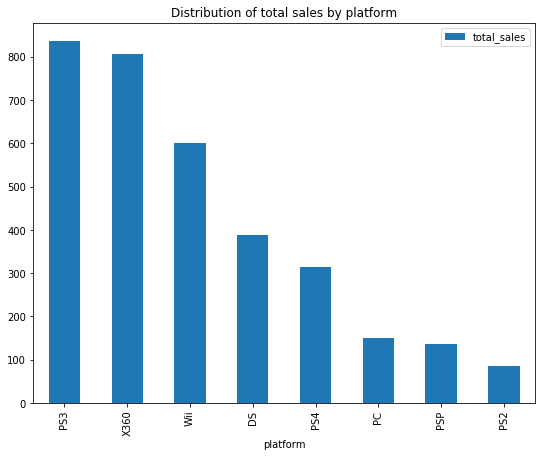

In [71]:
plt = games[games['platform'].isin(top10_platforms.index) &
           (games['year_of_release'] >= 2008)].copy()
draw_bar_chart(plt, 'platform', 'total_sales',
               title='Distribution of total sales by platform', 
              agg_func='sum', sort=True)

1) Clearly PS3 leads the pack in `total_sales` in the last 36 years; this is closely followed by X360.

In [72]:
mask = ((games['platform'] == 'DS') &
      (games['year_of_release'] == 1985)
       )
#print(games[~mask].shape)
top10_yos_sales = games[~mask].copy()
top10_yos_sales = (top10_yos_sales[top10_yos_sales['platform'].isin(top10_platforms.index) &
                                  (top10_yos_sales['year_of_release'] >= 2008)][['platform', 'year_of_release', 'total_sales']]
                                   )

In [73]:
# calculate total_sales by platform and year_of_release
top10_yos_sales = top10_yos_sales.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
# add a rank column for each platform
top10_yos_sales['rank'] = top10_yos_sales.sort_values(['platform', 
                             'year_of_release']).groupby(['platform'
                                                          ])['year_of_release'].rank(method='first')
# concat the lowest and highest total sales for each platform
top10_yos_sales = pd.concat([top10_yos_sales.groupby('platform').head(1),
           top10_yos_sales.groupby('platform').tail(1)]).reset_index(drop=True).sort_values(['platform', 
                                                                                             'year_of_release'])
# # create a max and min for total_sales and year_of_release
# top10_yos_sales = top10_yos_sales.groupby('platform')['year_of_release', 'total_sales'].agg({'min', 'max'})
# create a lag field for year_of_release and total_sales
top10_yos_sales['first_year'] = top10_yos_sales.groupby('platform')['year_of_release'].shift(1)
top10_yos_sales['first_sale'] = top10_yos_sales.groupby('platform')['total_sales'].shift(1)
top10_yos_sales.dropna(inplace=True)
# calculate the duration
top10_yos_sales['duration'] = top10_yos_sales['year_of_release'] - top10_yos_sales['first_year']
# calculate cagr
top10_yos_sales['cagr'] = (top10_yos_sales['total_sales']
                           /
                           top10_yos_sales['first_sale']) ** (1/top10_yos_sales['duration']) - 1

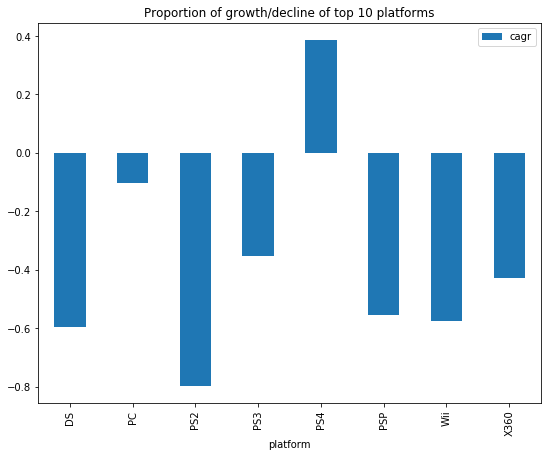

In [74]:
draw_bar_chart(top10_yos_sales, 'platform', 'cagr',
               title='Proportion of growth/decline of top 10 platforms', 
              agg_func='max', sort=False)

1) Only PS4 has had a positive growth of ~40% respectively in the last ~8 years. The
rest of the platforms have had a tough time navigating the ever changing demands of their consumers.

#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

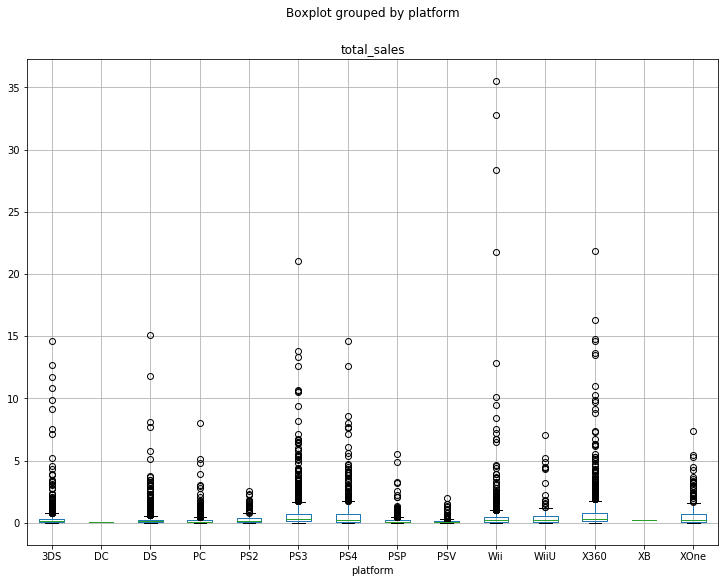

In [75]:
# Exclude outlier
mask = ((games['platform'] == 'DS') &
      (games['year_of_release'] == 1985)
       )
box_df = games[~mask].copy()
box_df = box_df[(box_df['year_of_release'] >= 2008)][['platform',
                                                     'year_of_release', 'total_sales']].reset_index(drop=True)
box_df.boxplot(by='platform', column=['total_sales'] , figsize=(12, 9))

1) A hard to read boxplot because of the outliers. Let us try to standardize the `total_sales` column to see whether thathelps or not.

In [76]:
box_df['norm_total_sales'] = (box_df.groupby('platform')['total_sales']
                                       .apply(lambda x: (x - x.min())/(x.max() - x.min()))
                                      )

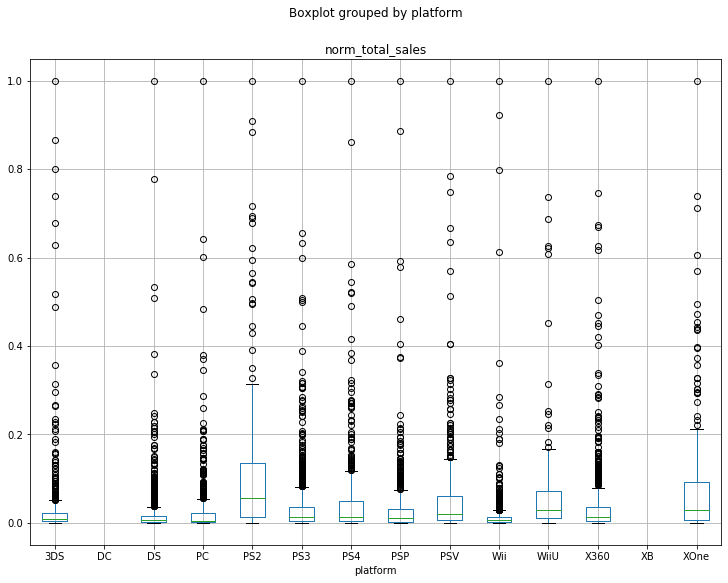

In [77]:
box_df.boxplot(by='platform', column=['norm_total_sales'] , figsize=(12, 9))

1) This can be adjusted by getting rid of outliers. However, this chart is relatively better than the previous one. Most
importantly, only PS2 shows the most variation of the lot in the last 8 years. From the growth rate chart, we also observed
that PS2 had a significantly negative growth. The next platform that shows a noticeable variation in mean `total_sales` is XOne.

The outliers make it difficult to conclude if the sales have been significant on any of these platforms. We need to
carry out some statistical tests to confirm this hypothesis.

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Although PS3 has had the highest `total_sales` in the last 8 years, it has witnessed a negative growth rate of ~40%.
In contrast, during the same period, PS4 its successor has seen a postive growth rate of 40%. So, we will use PS4 to answer this question.

In [78]:
# filter for PS4 which was released in 2013
ps4 = games[games['platform'] == 'PS4'][['total_sales', 'user_score', 'critic_score']]

In [79]:
ps4.shape

(392, 3)

In [80]:
# numerical correlation coefficient
ps4.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.032033,0.406568
user_score,-0.032033,1.000000,0.557659
critic_score,0.406568,0.557659,1.000000


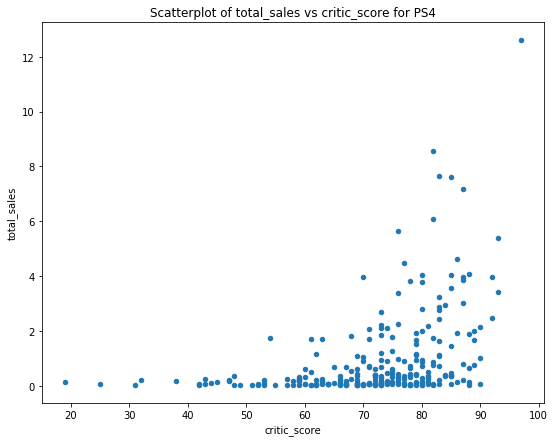

In [81]:
ps4.plot(kind='scatter', x='critic_score', y='total_sales',
         title='Scatterplot of total_sales vs critic_score for PS4', 
        figsize=(9, 7))

1) The chart doesn't reveal a strong positive correlation between `critic_score` and `total_sales`. Nevertheless, there
is a moderately strong positive correlation at play here.

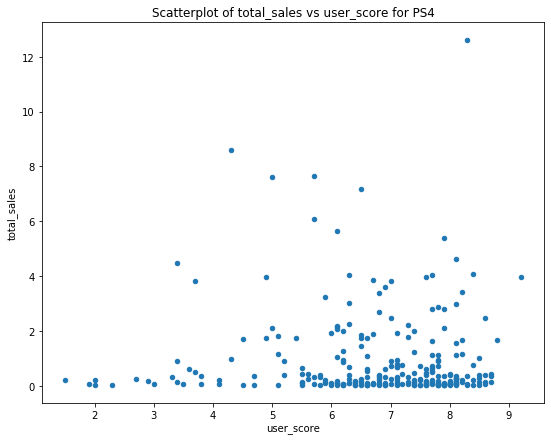

In [82]:
ps4.plot(kind='scatter', x='user_score', y='total_sales',
         title='Scatterplot of total_sales vs user_score for PS4', 
        figsize=(9, 7))

1) The chart doesn't reveal a postive correlation between `user_score` and `total_sales`. Infact, it is relatively
worse compared with the scatterplot above; the pearson's correlation coefficient confirms this. There appears no
relationship whatsoever.

In [83]:
# filter for PS4 which was released in 2013
ps4 = games[games['platform'] == 'PS4'][['total_sales', 'cleaned_user_score', 'cleaned_critic_score']]

In [84]:
# numerical correlation coefficient
ps4.corr()

,total_sales,cleaned_user_score,cleaned_critic_score
total_sales,1.000000,-0.055447,0.269100
cleaned_user_score,-0.055447,1.000000,0.313172
cleaned_critic_score,0.269100,0.313172,1.000000


1) The impact of filling missing values seems to have an effect on the `critic_score`; the correlation coefficient
has only gotten weaker. So, we may have to disregard this new field in any other analysis going forward.

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [85]:
mask = ((games['platform'] == 'DS') &
      (games['year_of_release'] == 1985)
       )
games_sale_df = games[~mask].copy()
games_sale_df = games_sale_df[(games_sale_df['year_of_release'] >= 2008)][['name', 'platform',
                                                     'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
                                                     'user_score', 'cleaned_user_score', 'critic_score', 
                                                     'cleaned_critic_score',                      
                                                     'year_of_release', 'total_sales', 'genre', 'manufacturer',
                                                                          'rating']].reset_index(drop=True)

In [86]:
# count of games between 2008 - 2016
games_sale_df['name'].value_counts()

LEGO Marvel Super Heroes                                                                                                                9
FIFA 14                                                                                                                                 9
Lego Batman 3: Beyond Gotham                                                                                                            8
LEGO The Hobbit                                                                                                                         8
LEGO Jurassic World                                                                                                                     8
FIFA 15                                                                                                                                 8
Terraria                                                                                                                                8
FIFA Soccer 13                    

In [87]:
# platform with the highest total_sales for FIFA 14
for name in games_sale_df['name'].value_counts().index[:5]:
    print('_________________')
    print('Total sales for {}'.format(name))
    print(
        games_sale_df[games_sale_df['name'] == name]
        .groupby('platform')['total_sales'].sum().sort_values(ascending=False)
    )

_________________
Total sales for LEGO Marvel Super Heroes
platform
X360    2.22
PS3     1.83
PS4     1.62
XOne    1.05
3DS     0.89
WiiU    0.74
PSV     0.51
DS      0.38
PC      0.17
Name: total_sales, dtype: float64
_________________
Total sales for FIFA 14
platform
PS3     6.46
X360    4.22
PS4     3.01
XOne    1.16
PSV     0.41
PC      0.40
Wii     0.38
3DS     0.23
PSP     0.19
Name: total_sales, dtype: float64
_________________
Total sales for Lego Batman 3: Beyond Gotham
platform
PS4     0.92
X360    0.89
PS3     0.73
WiiU    0.46
3DS     0.45
XOne    0.44
PSV     0.31
PC      0.06
Name: total_sales, dtype: float64
_________________
Total sales for LEGO The Hobbit
platform
PS4     0.60
PS3     0.46
X360    0.45
XOne    0.27
3DS     0.24
WiiU    0.22
PSV     0.14
PC      0.05
Name: total_sales, dtype: float64
_________________
Total sales for LEGO Jurassic World
platform
PS4     0.90
X360    0.87
PS3     0.85
XOne    0.66
3DS     0.62
WiiU    0.52
PSV     0.23
PC      0.04
Name:

In [88]:
# platform with the highest total_sales for FIFA 14
games_sale_df[games_sale_df['name'] == 'LEGO Marvel Super Heroes'].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
X360    2.22
PS3     1.83
PS4     1.62
XOne    1.05
3DS     0.89
WiiU    0.74
PSV     0.51
DS      0.38
PC      0.17
Name: total_sales, dtype: float64

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

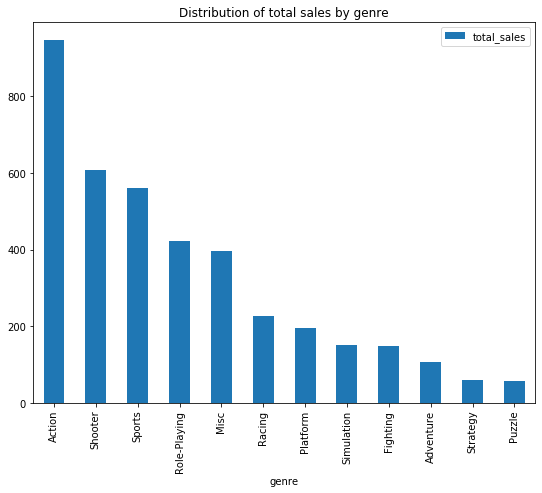

In [89]:
draw_bar_chart(games_sale_df, 'genre', 'total_sales',
               title='Distribution of total sales by genre', 
              agg_func='sum', sort=True)

1) Top 3 `genre` based on `total_sales` are: Action, Shooter, and Sports, and the bottom 3 `genre` are: Adventure, Strategy, and Puzzle.

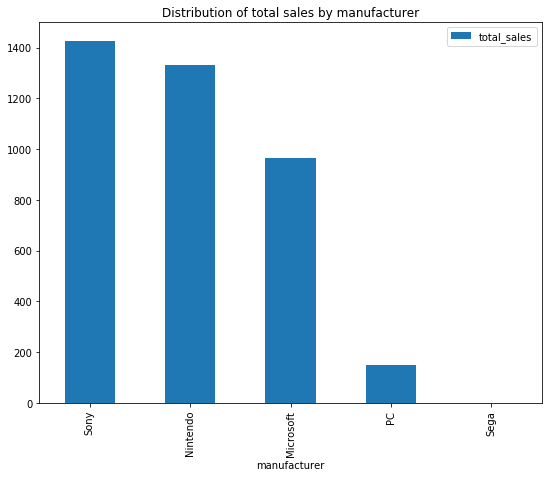

In [90]:
draw_bar_chart(games_sale_df, 'manufacturer', 'total_sales',
               title='Distribution of total sales by manufacturer', 
              agg_func='sum', sort=True)

1) Sony has been the most profitable manufacturer in the last 8 years, and Sega the least.

In [91]:
# top 3 genres by manufacturer based on their total_sales
(
    games_sale_df.groupby(['manufacturer',
                       'genre']
                     ).agg({'total_sales': sum}).sort_values(['manufacturer', 
                                                            'total_sales'],
                                                 ascending=[True, False]).reset_index().groupby('manufacturer').head(3)
)

,manufacturer,genre,total_sales
0,Microsoft,Shooter,283.01
1,Microsoft,Action,253.13
2,Microsoft,Sports,141.67
12,Nintendo,Misc,230.73
13,Nintendo,Action,225.51
14,Nintendo,Sports,189.55
24,PC,Role-Playing,32.83
25,PC,Shooter,27.86
26,PC,Simulation,26.47
36,Sega,Adventure,0.04


In [92]:
# bottom 3 genres by manufacturer based on their total_sales
(
    games_sale_df.groupby(['manufacturer',
                       'genre']
                     ).agg({'total_sales': sum}).sort_values(['manufacturer', 
                                                            'total_sales'],
                                                 ascending=[True, False]).reset_index().groupby('manufacturer').tail(3)
)

,manufacturer,genre,total_sales
9,Microsoft,Simulation,9.73
10,Microsoft,Strategy,8.38
11,Microsoft,Puzzle,0.21
21,Nintendo,Fighting,38.50
22,Nintendo,Shooter,27.58
23,Nintendo,Strategy,16.69
33,PC,Puzzle,0.83
34,PC,Platform,0.41
35,PC,Fighting,0.13
36,Sega,Adventure,0.04


#### Manufacturer wise distribution

In [93]:
games_sale_df['manufacturer'].value_counts(normalize=True)

Nintendo     0.383518
Sony         0.381673
Microsoft    0.153260
PC           0.081427
Sega         0.000123
Name: manufacturer, dtype: float64

#### Manufacturer wise market share

In [94]:
manufacturers = games_sale_df['manufacturer'].unique()
for manufacturer in manufacturers:
    print('---------------------')
    print('Market share for manufacturer {}'.format(manufacturer))
    print('{:.0f}%'.format(100 * games_sale_df[games_sale_df['manufacturer'] == manufacturer]['total_sales'].sum()/
                           games_sale_df['total_sales'].sum()))

---------------------
Market share for manufacturer Nintendo
34%
---------------------
Market share for manufacturer Microsoft
25%
---------------------
Market share for manufacturer Sony
37%
---------------------
Market share for manufacturer PC
4%
---------------------
Market share for manufacturer Sega
0%


#### Market share region-wise

In [95]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for region in regions:
    print('---------------------')
    print('Market share for region {}'.format(region))
    print('{:.0f}%'.format(100 * games_sale_df[region].sum() / games_sale_df['total_sales'].sum()))

---------------------
Market share for region na_sales
47%
---------------------
Market share for region eu_sales
31%
---------------------
Market share for region jp_sales
11%
---------------------
Market share for region other_sales
11%


**Conclusion**

1) Distribution of `total_sales` for the last 36 years shows that it increased until 2008, and from there on it kept falling sharply until 2016 - the end date.

2) PS2 is the most popular platform in terms of `total_sales` in the last 36 years.

3) Analysis of the top 10 platforms shows that the median lifespan for a platform is 10 years.

4) For the period of analysis, 2008-2016, PS3 leads the pack in terms of `total_sales`.

5) PS4 is the only platform in the top 10 during 2008-2016 to show a positive growth rate of 40%.

6) There is a moderately strong positive correlation between `total_sales` and `critic_score`, including between `user_score` and `critic_score`.

7) FIFA 14 and LEGO Marvel Super Heroes are the most popular games, and they appear across 9 platforms.

8) Action, Shooter, and Sports are the top 3 genres in terms of `total_sales`.


### Create a user profile for each region

#### The top five platforms. Describe variations in their market shares from region to region.

In [96]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    print('-----------------')
    print('Region {}'.format(region))
    print(games_sale_df.groupby('platform')[region].sum().sort_values(ascending=False))

-----------------
Region na_sales
platform
X360    490.69
PS3     349.13
Wii     332.87
DS      198.73
PS4     108.74
XOne     93.12
3DS      82.65
PC       41.07
WiiU     38.10
PSP      34.04
PS2      32.91
PSV      12.47
XB        0.13
DC        0.00
Name: na_sales, dtype: float64
-----------------
Region eu_sales
platform
PS3     293.73
X360    234.88
Wii     170.74
PS4     141.09
PC       92.17
DS       86.13
3DS      61.27
XOne     51.59
PSP      26.21
WiiU     25.13
PS2      14.24
PSV      13.07
XB        0.04
DC        0.00
Name: eu_sales, dtype: float64
-----------------
Region jp_sales
platform
3DS     100.62
DS       76.12
PS3      74.11
PSP      60.46
Wii      47.01
PSV      21.84
PS4      15.96
WiiU     13.01
X360      9.30
PS2       8.47
XOne      0.34
DC        0.04
XB        0.00
PC        0.00
Name: jp_sales, dtype: float64


1) The top 3 popular platforms in NA region are: X360, PS3, and Wii. In EU region they are: PS3, X360 and Wii. And, in
the JP region they are: 3DS, DS and PS3. 

#### The top five genres. Explain the difference.

In [97]:
for region in regions:
    print('-----------------')
    print('Region {}'.format(region))
    print(games_sale_df.groupby('genre')[region].sum().sort_values(ascending=False)[:5])

-----------------
Region na_sales
genre
Action          433.74
Shooter         311.26
Sports          276.27
Misc            211.61
Role-Playing    155.81
Name: na_sales, dtype: float64
-----------------
Region eu_sales
genre
Action          310.59
Shooter         208.35
Sports          185.19
Misc            107.00
Role-Playing     94.46
Name: eu_sales, dtype: float64
-----------------
Region jp_sales
genre
Role-Playing    138.12
Action           90.16
Misc             37.33
Sports           30.69
Adventure        23.36
Name: jp_sales, dtype: float64


1) Both NA and EU consumers share the same tates in genre. However, consumers in JP have a different preference in genres.

#### Do ESRB ratings affect sales in individual regions?

In [98]:
for region in regions:
    print('-----------------')
    print('Region {}'.format(region))
    print(games_sale_df.groupby('rating')[region].sum().sort_values(ascending=False))

-----------------
Region na_sales
rating
E       536.93
M       502.60
T       303.41
E10+    251.88
EC        1.32
AO        0.00
RP        0.00
Name: na_sales, dtype: float64
-----------------
Region eu_sales
rating
M       362.65
E       326.61
T       187.62
E10+    144.53
RP        0.03
AO        0.00
EC        0.00
Name: eu_sales, dtype: float64
-----------------
Region jp_sales
rating
E       77.17
T       64.51
M       39.33
E10+    25.67
AO       0.00
EC       0.00
RP       0.00
Name: jp_sales, dtype: float64


In [99]:
for region in regions:
    print('-----------------')
    print('Region {}'.format(region))
    print(games_sale_df.groupby('rating')[region].sum().sort_values(ascending=False))

-----------------
Region na_sales
rating
E       536.93
M       502.60
T       303.41
E10+    251.88
EC        1.32
AO        0.00
RP        0.00
Name: na_sales, dtype: float64
-----------------
Region eu_sales
rating
M       362.65
E       326.61
T       187.62
E10+    144.53
RP        0.03
AO        0.00
EC        0.00
Name: eu_sales, dtype: float64
-----------------
Region jp_sales
rating
E       77.17
T       64.51
M       39.33
E10+    25.67
AO       0.00
EC       0.00
RP       0.00
Name: jp_sales, dtype: float64


1) Top 3 published games in NA have the following rating: E - Everyone, M - Teens 17+, and T Teens 13+. For the EU
region it is: M, E and T. For the JP region it is: E, T and M.
        


**Conclusion**

1) Looking at the popularity of the platforms by region, we can see that Sony and Microsoft are more popular manufacturers in NA and EU regions. Whereas in JP region, it is Nintendo.

2) With respect to popularity of genres, both NA and EU share similar tastes in genres. Whereas, we can see a cultural shift in choice of genre in the JP region.

3) In terms of impact of ratings, all that is obvious is that games with E rating are the most popular in terms of
`total_sales` in NA. However, in EU region, it is games with M rating that command the highest market share. And, in JP region it is again E rated games.

<div class="alert alert-success"> <b>Reviewer comment:</b> 

We analyzed our data in detail and studied the portraits of users.
    
Including it was worth visualizing the resulting portraits, because visually the information is studied easier.
    
Let's now test our hypotheses.    
</div>


#### Test the following hypotheses

#### Average user ratings of the XOne and PC platforms are the same.

\$H_{0}: \mu_{xone} \= \mu_{pc}\$

\$H_{1}: \mu_{xone} \ne \mu_{pc}\$

Collect the sample means for both xone and pc users. Since we are testing for equality
of 2 independent sample means coming from the same video games dataser we will use T test for independence, and assume that their variance is similar.

Sample means are computed after excluding the missing `user_score` for both platforms

\$ \mu_{xone} \= 6.523\$

\$ \mu_{pc} \= 6.72\$

\$alpha \= 0.05 \$

<div class="alert alert-success"> <b>Reviewer comment:</b> 

Hypotheses formulated correctly. 
    
    
Great to use latex 😊
    
**Best practies:**
    
Before testing the hypothesis, I recommend checking the variances of the samples in order to correctly determine the `equal_val` attribute in the T-test.
    
Including it is worth visualizing the distribution of each sample in order to determine whether they have a normal distribution or not.
    
So we will show the consistency and consistency of our actions.
    
</div>


In [100]:
print('XOne sample mean ',games_sale_df[games_sale_df['platform'] == 'XOne']['user_score'].dropna().mean())
print('PC sample mean ', games_sale_df[games_sale_df['platform'] == 'PC']['user_score'].dropna().mean())

XOne sample mean  6.523
PC sample mean  6.72


In [101]:
sample_user_score_xone = games_sale_df[games_sale_df['platform'] == 'XOne']['user_score'].dropna()
sample_user_score_pc = games_sale_df[games_sale_df['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05
results = stats.ttest_ind(sample_user_score_xone, sample_user_score_pc)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: 0.13104121825440546
We can't reject the null hypothesis


1) There is no evidence to reject the null hypothesis. Therefore, we fail to reject the null that the mean user ratings for Xone and PC are the same.

#### Average user ratings for the Action and Sports genres are different.

\$H_{0}: \mu_{action} \= \mu_{sports}\$

\$H_{1}: \mu_{action} \ne \mu_{sports}\$

Collect the sample means for both Action and Sports genre users. Since we are testing for equality
of 2 independent sample means coming from the same video games dataser we will use T test for independence, and assume that their variance is similar.

Sample means are computed after excluding the missing `user_score` for both platforms

\$ \mu_{action} \= 6.855\$

\$ \mu_{sports} \= 6.22\$

\$alpha \= 0.05 \$

<div class="alert alert-success"> <b>Reviewer comment:</b> 

Hypotheses formulated correctly. 
    
    
    
</div>


In [102]:
print('Action sample mean ',games_sale_df[games_sale_df['genre'] == 'Action']['user_score'].dropna().mean())
print('Sports sample mean ', games_sale_df[games_sale_df['genre'] == 'Sports']['user_score'].dropna().mean())

Action sample mean  6.855
Sports sample mean  6.22


In [103]:
sample_user_score_action = games_sale_df[games_sale_df['genre'] == 'Action']['user_score'].dropna()
sample_user_score_sports = games_sale_df[games_sale_df['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05
results = stats.ttest_ind(sample_user_score_action, sample_user_score_sports)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: 1.5755200064289407e-15
We reject the null hypothesis


1) There is evidence to show that mean `user_score` for Action and Sports genre
players are statistically significant. Therefore, we reject the null that they are equal.

**Conclusion**

1) Replacement of missing values did have an impact on `critic_score`, but not on `user_score`, `rating` and `year_of_release`.

2) The T-test reveals that the mean `user_score` for Action genre and Sports genre are statistically significant.

<div class="alert alert-success"> <b>Reviewer comment:</b> 

Please note that our actions are also repeated in terms of calculating statistical tests, this suggests that we can also create a function here 😊
    
</div>


**Summary**

1) In terms of `total_sales`, NA region is the most profitable with a market share of 47%, followed by EU region with 31% and JP with 11%. This helps marketers to focus their campaigns accordingly.

2) The market has a whole has witnessed a declining sales trend in the last 26 years; it peaked in 2008, and has experienced a sharp drop from there on. This indicates a shift from video game consoles, and its variants to mobile gaming, which is not captured in this dataset.

3) `critic_score` is moderately important in influencing revenue, which is why it is important to fill up the missing values using a reliable source to be able to take advantage of this feature. However, `user_score` doesn't seem to influence `total_sales` despite having a positive correlation with `critic_score`; this implies some other factore might be driving `user_score`, which has no impact on sales.

4) An analysis of the top 10 platforms between 2008-2016 reveals that most of the top performing platforms have seen a sharp decline in growth rate. Only PS4 managed to arrest the decline with a positive growth rate of 40%.

5) PS2 is the most profitable platform in the 8 year period that the data was analyzed for. The median lifespan for a platform during this period is 10 years.

6) Distribution wise, Nintendo is the most popular manufacturer with almost 38% share. On the heels of Nintendo is Sony with a similar market share of 38%, followed by Microsoft at 15%. However, in terms of revenue, Sony has a higher market share of 37%, followed by Nintendo at 34% and Microsoft at 25%.

7) The user profile segmentation by revenue by regions reveals an interesting find: NA and EU users have a preference for Action, Shooter and Sports in that order, whereas JP users have a preference for Role-playing, Action and Misc in that oder, clearly showing a cultural influence in choice of video game playing.

8) In terms of platform too, the user profile reveals that EU and NA users prefer games on Microsoft and Sony platforms over Nintendo, which is more popular in JP.

9) With respect to ratings, games that have an E or M rating have a higher markert share over other rating in NA, a rating of M or E commands a higher market share in EU, whereas, a rating of E or T garners the highest market share in JP.

10) Marketing teams have multiple variables at their disposal to build a campaign. Some of them are: `platform`, `genre`, `rating`, and `critic score`.

<div class="alert alert-success"> <b>Reviewer comment:</b> 

The conclusions are clear and logical, and most importantly, they are supported by the revealed facts.
       
In general, the project itself is at a good level! Throughout the entire work, the depth of the task development is felt and this is an absolute plus for us. A large number of methods have been used that will help you in your future projects.
    
    
Congratulations on the successful completion of the project 😊👍
    
And I wish you success in your new work 😊
    
**[general comment]** Cells ** markdown ** including we can use as an additional way to style our project. I left a link below, with examples of styling.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>
